In [1]:
from astropy.io import fits
import numpy as np
import matplotlib
%matplotlib inline
import pylab as plt
import sys
import xidplus
import pickle
import scipy.stats as stats
from scipy.stats import norm

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#---Read in truth catalogue---
folder='/Users/pdh21/HELP/XID_plus_output/sims/lacy/'
#'/research/astro/fir/cclarke/lacey/released/'
hdulist=fits.open(folder+'lacey_07012015_MillGas.ALLVOLS_cat_PSW_COSMOS_test.fits')
fcat_sim=hdulist[1].data
hdulist.close()

fcat_sim=fcat_sim[fcat_sim['S100']>0.050]

In [3]:
idx_xidp=fcat_sim['S100'] >0.050#cut so that only sources with a 100micron flux of > 50 micro janskys (Roseboom et al. 2010 cut 24 micron sources at 50microJys)
idx_xidpT=fcat_sim['S100'] >0.050#cut so that only sources with a 100micron flux of > 50 micro janskys (Roseboom et al. 2010 cut 24 micron sources at 50microJys)


#---Read in XID+ posterior---

#folder='/research/astro/fir/HELP/XID_plus_output/100micron/log_prior_flux/'
folder='/Users/pdh21/HELP/XID_plus_output/100micron/conf_noise/uniform_prior/'
#'/research/astro/fir/HELP/XID_plus_output/100micron/log_uniform_prior_test/old/'
infile=folder+'Master_prior.pkl'
with open(infile, "rb") as f:
    obj = pickle.load(f)
prior250=obj['psw']
prior350=obj['pmw']    
prior500=obj['plw']

folder='/Users/pdh21/HELP/XID_plus_output/100micron/conf_noise/uniform_prior/'
infile=folder+'master_posterior.pkl'

with open(infile, "rb") as f:
    obj = pickle.load(f)
posterior=obj['posterior']

samples,chains,params=posterior.shape

flattened_post=posterior.reshape(samples*chains,params)

In [55]:
from matplotlib.backends.backend_pdf import PdfPages
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
sns.set_context("poster")

rcParams.update({'font.size': 18})
pp = PdfPages('/Users/pdh21/HELP/XID_plus/Paper/Detections.pdf')
import seaborn as sns
sns.set(color_codes=True)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_style("ticks")

In [4]:
pctiles=np.percentile(flattened_post, [16,50,84], axis=0)

In [5]:
pctiles.shape

/usr/local/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/usr/local/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


(3, 194478)

In [75]:
print fcat_sim['RA'][idx_xidp]
id=(pctiles[1,0:prior250.nsrc]>4) & (pctiles[1,prior250.nsrc+1:2*prior250.nsrc+1]>4) & (pctiles[1,2*prior250.nsrc+2:3*prior250.nsrc+2]>4)
print id.sum()

[ 149.96883137  149.99619909  150.92582623 ...,  149.68114305  150.55617263
  150.7361606 ]
9016


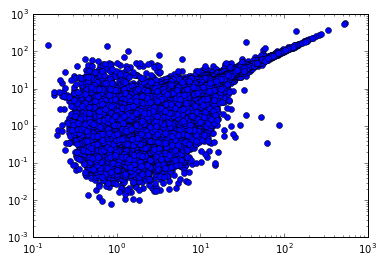

In [7]:
plt.loglog(pctiles[1,np.arange(0,prior250.nsrc)],fcat_sim['S250'][idx_xidp],'o')

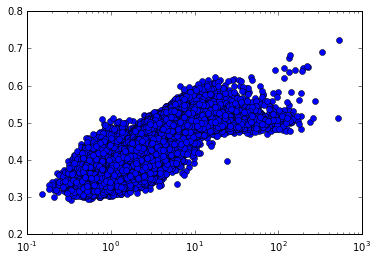

In [8]:
plt.semilogx(pctiles[1,np.arange(0,prior250.nsrc)],(pctiles[1,np.arange(0,prior250.nsrc)]-pctiles[0,np.arange(0,prior250.nsrc)])/(pctiles[2,np.arange(0,prior250.nsrc)]-pctiles[0,np.arange(0,prior250.nsrc)]),'o')

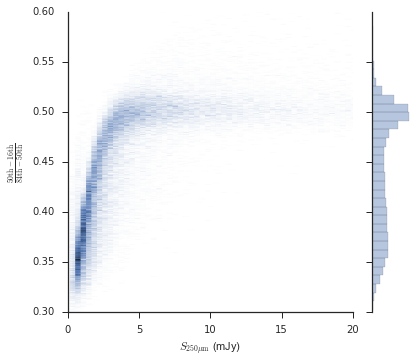

In [56]:

plot=sns.jointplot(pctiles[1,np.arange(0,prior250.nsrc)],(pctiles[1,np.arange(0,prior250.nsrc)]-pctiles[0,np.arange(0,prior250.nsrc)])/(pctiles[2,np.arange(0,prior250.nsrc)]-pctiles[0,np.arange(0,prior250.nsrc)]),kind="hex",stat_func=None,rasterized=True);
plot.ax_joint.set_xlim(0,20)
plot.ax_joint.set_ylim(0.3,0.6)
plot.ax_marg_x.remove()
plot.set_axis_labels(r'$S_{250\mathrm{\mu m}}$ (mJy)',r'$\frac{\mathrm{50th - 16th}}{\mathrm{84th - 50th}}$')
plt.tight_layout()
pp.savefig(plot.fig)

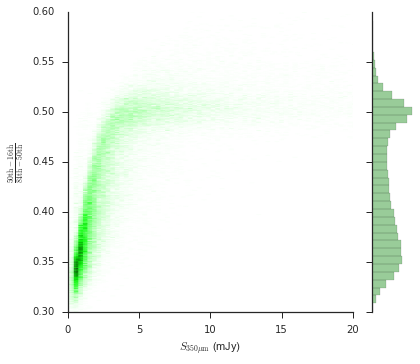

In [57]:
plot=sns.jointplot(pctiles[1,prior250.nsrc+1+np.arange(0,prior250.nsrc)],(pctiles[1,prior250.nsrc+1+np.arange(0,prior250.nsrc)]-pctiles[0,prior250.nsrc+1+np.arange(0,prior250.nsrc)])/(pctiles[2,prior250.nsrc+1+np.arange(0,prior250.nsrc)]-pctiles[0,prior250.nsrc+1+np.arange(0,prior250.nsrc)]),kind="hex",stat_func=None,color='green',rasterized=True);
plot.ax_joint.set_xlim(0,20)
plot.ax_joint.set_ylim(0.3,0.6)
plot.ax_marg_x.remove()
plot.set_axis_labels(r'$S_{350\mathrm{\mu m}}$ (mJy)',r'$\frac{\mathrm{50th - 16th}}{\mathrm{84th - 50th}}$')
plt.tight_layout()
pp.savefig(plot.fig)

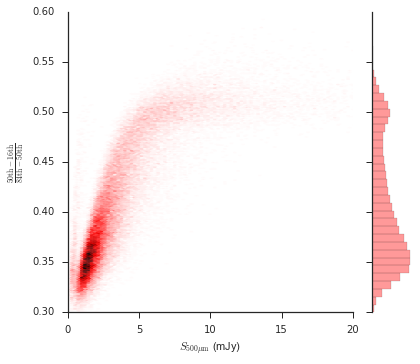

In [58]:
plot=sns.jointplot(pctiles[1,2*prior250.nsrc+2+np.arange(0,prior250.nsrc)],(pctiles[1,2*prior250.nsrc+2+np.arange(0,prior250.nsrc)]-pctiles[0,2*prior250.nsrc+2+np.arange(0,prior250.nsrc)])/(pctiles[2,2*prior250.nsrc+2+np.arange(0,prior250.nsrc)]-pctiles[0,2*prior250.nsrc+2+np.arange(0,prior250.nsrc)]),kind="hex",stat_func=None,color='red',rasterized=True);
plot.ax_joint.set_xlim(0,20)
plot.ax_joint.set_ylim(0.3,0.6)
plot.ax_marg_x.remove()
plot.set_axis_labels(r'$S_{500\mathrm{\mu m}}$ (mJy)',r'$\frac{\mathrm{50th - 16th}}{\mathrm{84th - 50th}}$')
plt.tight_layout()
pp.savefig(plot.fig)
pp.close()

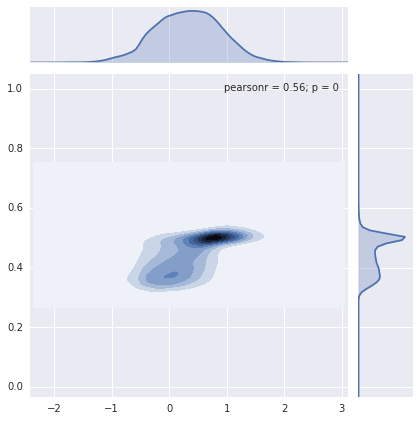

In [33]:
plot=sns.jointplot(np.log10(fcat_sim['S250'][idx_xidp]),(pctiles[1,np.arange(0,prior250.nsrc)]-pctiles[0,np.arange(0,prior250.nsrc)])/(pctiles[2,np.arange(0,prior250.nsrc)]-pctiles[0,np.arange(0,prior250.nsrc)]),kind="kde");


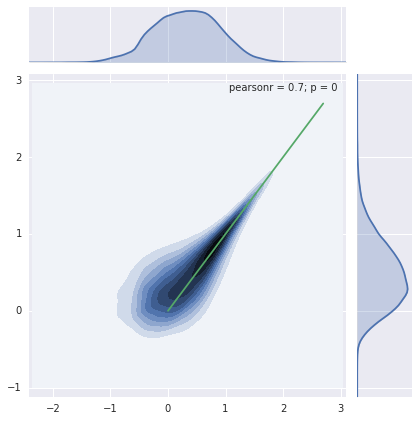

In [20]:
plot=sns.jointplot(np.log10(fcat_sim['S250'][idx_xidp]),np.log10(pctiles[1,np.arange(0,prior250.nsrc)]*1.07),kind="kde");
x=np.arange(0,500)
plot.ax_joint.plot(np.log10(x),np.log10(x))

In [15]:
dir(plot.ax_joint)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getstate__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_axes',
 u'_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_axisbg',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_cursorProps',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_legend_handles',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_init_axis',
 '_label',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_navigate',
 '_navigate_mode',
 '_oid',
 '_originalPosition',
 '_path_effects',
 '_pcolorargs',
 '_picker',
 '_

In [59]:
import sys
sys.path.append('/Users/pdh21/Python/stacking/')
from stacking import stack_image


In [60]:
bins_mstar=np.linspace(9,11,num=5,endpoint=True,)
inds_mstar = np.digitize(np.log10(fcat_sim['MSTARS_TOT']), bins_mstar)
bins_red=np.linspace(0,3,num=5,endpoint=True)
inds_red = np.digitize(fcat_sim['Z_OBS'], bins_red)
S250_Mstar=np.empty((bins_mstar.size+1,bins_red.size+1))
S250_Mstar_truth=np.empty((bins_mstar.size+1,bins_red.size+1))
S250_Mstar_xidplus=np.empty((bins_mstar.size+1,bins_red.size+1,3000))
S350_Mstar=np.empty((bins_mstar.size+1,bins_red.size+1))
S350_Mstar_truth=np.empty((bins_mstar.size+1,bins_red.size+1))
S350_Mstar_xidplus=np.empty((bins_mstar.size+1,bins_red.size+1,3000))
S500_Mstar=np.empty((bins_mstar.size+1,bins_red.size+1))
S500_Mstar_truth=np.empty((bins_mstar.size+1,bins_red.size+1))
S500_Mstar_xidplus=np.empty((bins_mstar.size+1,bins_red.size+1,3000))

In [61]:
fig = plt.figure(figsize=(30,30))
map250=np.empty((prior250.imhdu['NAXIS2'],prior250.imhdu['NAXIS1']))
map250[prior250.sy_pix,prior250.sx_pix]=prior250.sim
map350=np.empty((prior350.imhdu['NAXIS2'],prior350.imhdu['NAXIS1']))
map350[prior350.sy_pix,prior350.sx_pix]=prior350.sim
map500=np.empty((prior500.imhdu['NAXIS2'],prior500.imhdu['NAXIS1']))
map500[prior500.sy_pix,prior500.sx_pix]=prior500.sim
ii=1
for i in range(0,bins_mstar.size+1):
    for j in range(0,bins_red.size+1):
        src_boost=False
        ind_stack=np.arange(0,prior250.nsrc)[(inds_mstar==i) & (inds_red==j)]
        if ind_stack.size > 0:
            ra=fcat_sim['RA'][ind_stack]
            dec=fcat_sim['DEC'][ind_stack]
            meanStack250, varStack, stack, stack2,b1,sig1, mask, nsamp = stack_image(map250,prior250.imhdu,ra,dec,med=False,noFilt=False,mask=True,size=7,src_boost=src_boost)
            #plt.subplot(bins.size+1,3,ii)
            #plt.imshow(meanStack250, interpolation='nearest',vmin=-10,vmax=20)
            #plt.colorbar()
            S250_Mstar[i,j]=meanStack250[3,3]
            S250_Mstar_truth[i,j]=np.mean(fcat_sim['S250'][ind_stack])
            S250_Mstar_xidplus[i,j,:]=np.mean(flattened_post[:,ind_stack],axis=1)
            meanStack350, varStack, stack, stack2,b1,sig1, mask, nsamp = stack_image(map350,prior350.imhdu,ra,dec,med=False,noFilt=False,mask=True,size=7,src_boost=src_boost)
            #plt.subplot(bins.size+1,3,ii+1)
            #plt.imshow(meanStack350, interpolation='nearest',vmin=-10,vmax=20)
            #plt.colorbar()
            S350_Mstar[i,j]=meanStack350[3,3]
            S350_Mstar_truth[i,j]=np.mean(fcat_sim['S350'][ind_stack])
            S350_Mstar_xidplus[i,j,:]=np.mean(flattened_post[:,1+prior250.nsrc+ind_stack],axis=1)
            meanStack500, varStack, stack, stack2,b1,sig1, mask, nsamp = stack_image(map500,prior500.imhdu,ra,dec,med=False,noFilt=False,mask=True,size=5,src_boost=src_boost)
            #plt.subplot(bins.size+1,3,ii+2)
            #plt.imshow(meanStack500, interpolation='nearest',vmin=-10,vmax=20)
            #plt.colorbar()
            S500_Mstar[i,j]=meanStack500[3,3]
            S500_Mstar_truth[i,j]=np.mean(fcat_sim['S500'][ind_stack])
            S500_Mstar_xidplus[i,j,:]=np.mean(flattened_post[:,2+2*prior250.nsrc+ind_stack],axis=1)
    
    
    

number of galaxies: 2909
number of galaxies: 2909
number of galaxies: 2909
number of galaxies: 96
number of galaxies: 96
number of galaxies: 96
number of galaxies: 412
number of galaxies: 412
number of galaxies: 412
number of galaxies: 656
number of galaxies: 656
number of galaxies: 656
number of galaxies: 110
number of galaxies: 110
number of galaxies: 110
number of galaxies: 4192
number of galaxies: 4192
number of galaxies: 4192
number of galaxies: 2826
number of galaxies: 2826
number of galaxies: 2826
number of galaxies: 1672
number of galaxies: 1672
number of galaxies: 1672
number of galaxies: 2025
number of galaxies: 2025
number of galaxies: 2025
number of galaxies: 593
number of galaxies: 593
number of galaxies: 593
number of galaxies: 3633
number of galaxies: 3633
number of galaxies: 3633
number of galaxies: 8606
number of galaxies: 8606
number of galaxies: 8606
number of galaxies: 3876
number of galaxies: 3876
number of galaxies: 3876
number of galaxies: 2603
number of galaxies

In [62]:
hdulist_psw=fits.open('/Users/pdh21/astrodata/sims/lacey/cosmos_itermap_simulated_observation_w_noise_PSW_hipe_20160526.fits.gz')

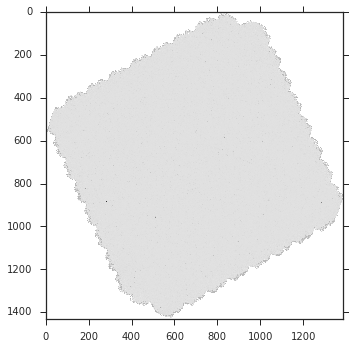

In [63]:
plt.imshow(hdulist_psw[1].data*1000.0)

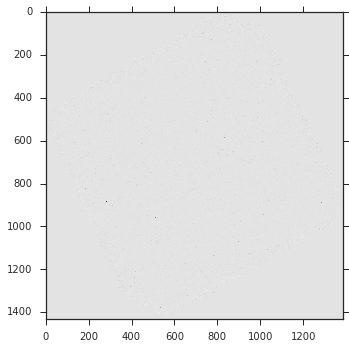

In [64]:
plt.imshow(map250)

In [65]:
meanStack250, varStack, stack_new, stack2,b1,sig1, mask, nsamp = stack_image(hdulist_psw[1].data*1000.0,hdulist_psw[1].header,ra[np.array(index)],dec[np.array(index)],med=False,noFilt=False,mask=True,size=7,src_boost=src_boost)
plt.imshow((stack_new/np.sum(fcat_sim['S250'][np.array(index)]))/prior250.prf[32:69:6,32:69:6],cmap=cmap,interpolation='nearest',vmin=0.9,vmax=1.2)
plt.colorbar()
print np.max(stack_new)/np.sum(fcat_sim['S250'][np.array(index)])

NameError: name 'index' is not defined

In [ ]:
#---Read in truth catalogue---
folder='/Users/pdh21/HELP/XID_plus_output/sims/lacy/'
#'/research/astro/fir/cclarke/lacey/released/'
hdulist=fits.open(folder+'lacey_07012015_MillGas.ALLVOLS_cat_PSW_COSMOS_test.fits')
fcat_sim=hdulist[1].data
hdulist.close()
from pymoc import MOC
from xidplus import moc_routines
plw_moc=MOC(filename='/Users/pdh21/astrodata/sims/lacey/cosmos_itermap_simulated_observation_w_noise_PSW_hipe_20160526-2-_MOC.fits')
ra=fcat_sim['RA']
dec=fcat_sim['DEC']
index=moc_routines.check_in_moc(ra,dec,plw_moc,keep_inside=True)
print ra[np.array(index)]
meanStack250, varStack, stack, stack2,b1,sig1, mask, nsamp = stack_image(map250,prior250.imhdu,ra[np.array(index)],dec[np.array(index)],med=False,noFilt=False,mask=True,size=7,src_boost=src_boost)
plt.imshow((stack/np.sum(fcat_sim['S250'][np.array(index)]))/prior250.prf[32:69:6,32:69:6],cmap=cmap,interpolation='nearest')
plt.colorbar()
print np.max(stack)/np.sum(fcat_sim['S250'][np.array(index)])            

In [ ]:
plt.imshow((stack/np.sum(fcat_sim['S250'][np.array(index)]))/(stack_new/np.sum(fcat_sim['S250'][np.array(index)])),cmap=cmap,interpolation='nearest')
plt.colorbar()

In [ ]:
meanStack250, varStack, stack, stack2,b1,sig1, mask, nsamp = stack_image(map250,prior250.imhdu,prior250.sra,prior250.sdec,med=False,noFilt=False,mask=True,size=7,src_boost=src_boost)
plt.imshow((stack/np.sum(fcat_sim['S250'][fcat_sim['S100'] >0.050])),cmap=cmap,interpolation='nearest')
plt.colorbar()
print np.max(stack)/np.sum(fcat_sim['S250'][fcat_sim['S100'] >0.050])

In [ ]:
import seaborn as sns
cmap=sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)

plt.imshow((stack/np.sum(fcat_sim['S250'][fcat_sim['S100'] >0.050])),cmap=cmap,interpolation='nearest')
plt.colorbar()
print np.max(stack)/np.sum(fcat_sim['S250'][fcat_sim['S100'] >0.050])

In [ ]:
plt.imshow(prior250.prf[32:69:6,32:69:6],cmap=cmap,interpolation='nearest')
plt.colorbar()


In [ ]:
cmap=sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)
vmin=-0.05
vmax=0.0
plt.imshow((stack/np.sum(fcat_sim['S500']))-prior500.prf[14:87:12,14:87:12],cmap=cmap,interpolation='nearest')
plt.colorbar()


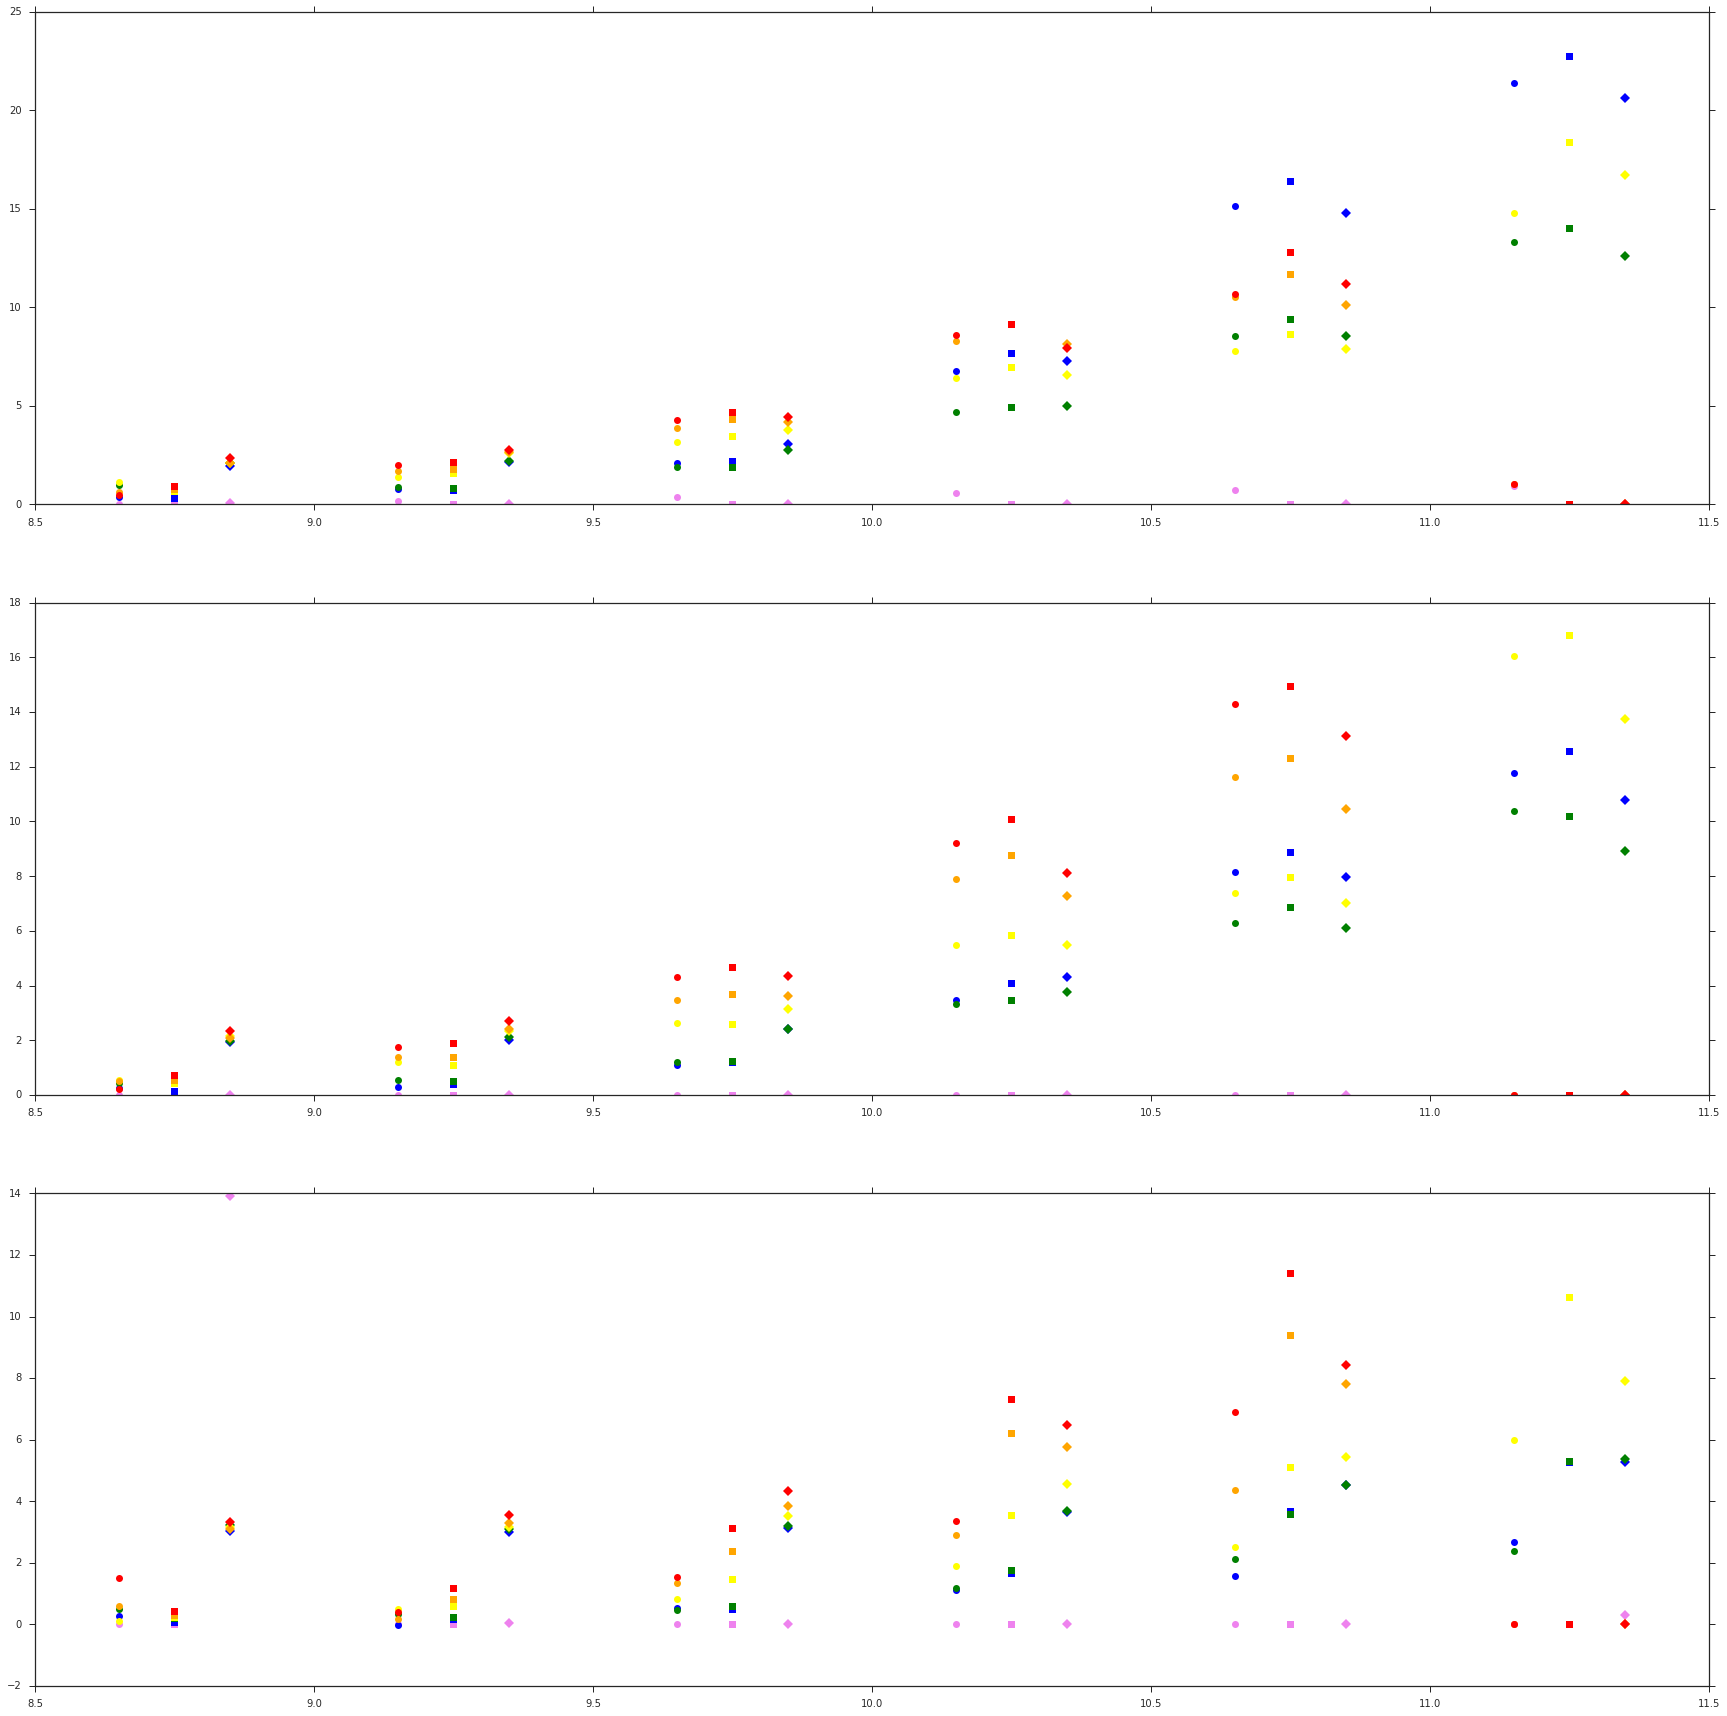

In [66]:
fig = plt.figure(figsize=(30,30))
color=['violet','blue','green','yellow','orange','red']
for i in range(0,bins_red.size+1):
    plt.subplot(3,1,1)
    plt.plot(np.append(bins_mstar-(bins_mstar[1]-bins_mstar[0])/2.0,bins_mstar[-1]+(bins_mstar[1]-bins_mstar[0])/2.0)-0.1,S250_Mstar[:,i],'o',color=color[i])
    plt.plot(np.append(bins_mstar-(bins_mstar[1]-bins_mstar[0])/2.0,bins_mstar[-1]+(bins_mstar[1]-bins_mstar[0])/2.0),S250_Mstar_truth[:,i],'s',color=color[i])
    plt.plot(np.append(bins_mstar-(bins_mstar[1]-bins_mstar[0])/2.0,bins_mstar[-1]+(bins_mstar[1]-bins_mstar[0])/2.0)+0.1,np.mean(S250_Mstar_xidplus[:,i,:],axis=1),'D',color=color[i])

    
    plt.subplot(3,1,2)

    plt.plot(np.append(bins_mstar-(bins_mstar[1]-bins_mstar[0])/2.0,bins_mstar[-1]+(bins_mstar[1]-bins_mstar[0])/2.0)-0.1,S350_Mstar[:,i],'o',color=color[i])
    plt.plot(np.append(bins_mstar-(bins_mstar[1]-bins_mstar[0])/2.0,bins_mstar[-1]+(bins_mstar[1]-bins_mstar[0])/2.0),S350_Mstar_truth[:,i],'s',color=color[i])
    plt.plot(np.append(bins_mstar-(bins_mstar[1]-bins_mstar[0])/2.0,bins_mstar[-1]+(bins_mstar[1]-bins_mstar[0])/2.0)+0.1,np.mean(S350_Mstar_xidplus[:,i,:],axis=1),'D',color=color[i])

    plt.subplot(3,1,3)

    plt.plot(np.append(bins_mstar-(bins_mstar[1]-bins_mstar[0])/2.0,bins_mstar[-1]+(bins_mstar[1]-bins_mstar[0])/2.0)-0.1,S500_Mstar[:,i],'o',color=color[i])
    plt.plot(np.append(bins_mstar-(bins_mstar[1]-bins_mstar[0])/2.0,bins_mstar[-1]+(bins_mstar[1]-bins_mstar[0])/2.0),S500_Mstar_truth[:,i],'s',color=color[i])
    plt.plot(np.append(bins_mstar-(bins_mstar[1]-bins_mstar[0])/2.0,bins_mstar[-1]+(bins_mstar[1]-bins_mstar[0])/2.0)+0.1,np.mean(S500_Mstar_xidplus[:,i,:],axis=1),'D',color=color[i])


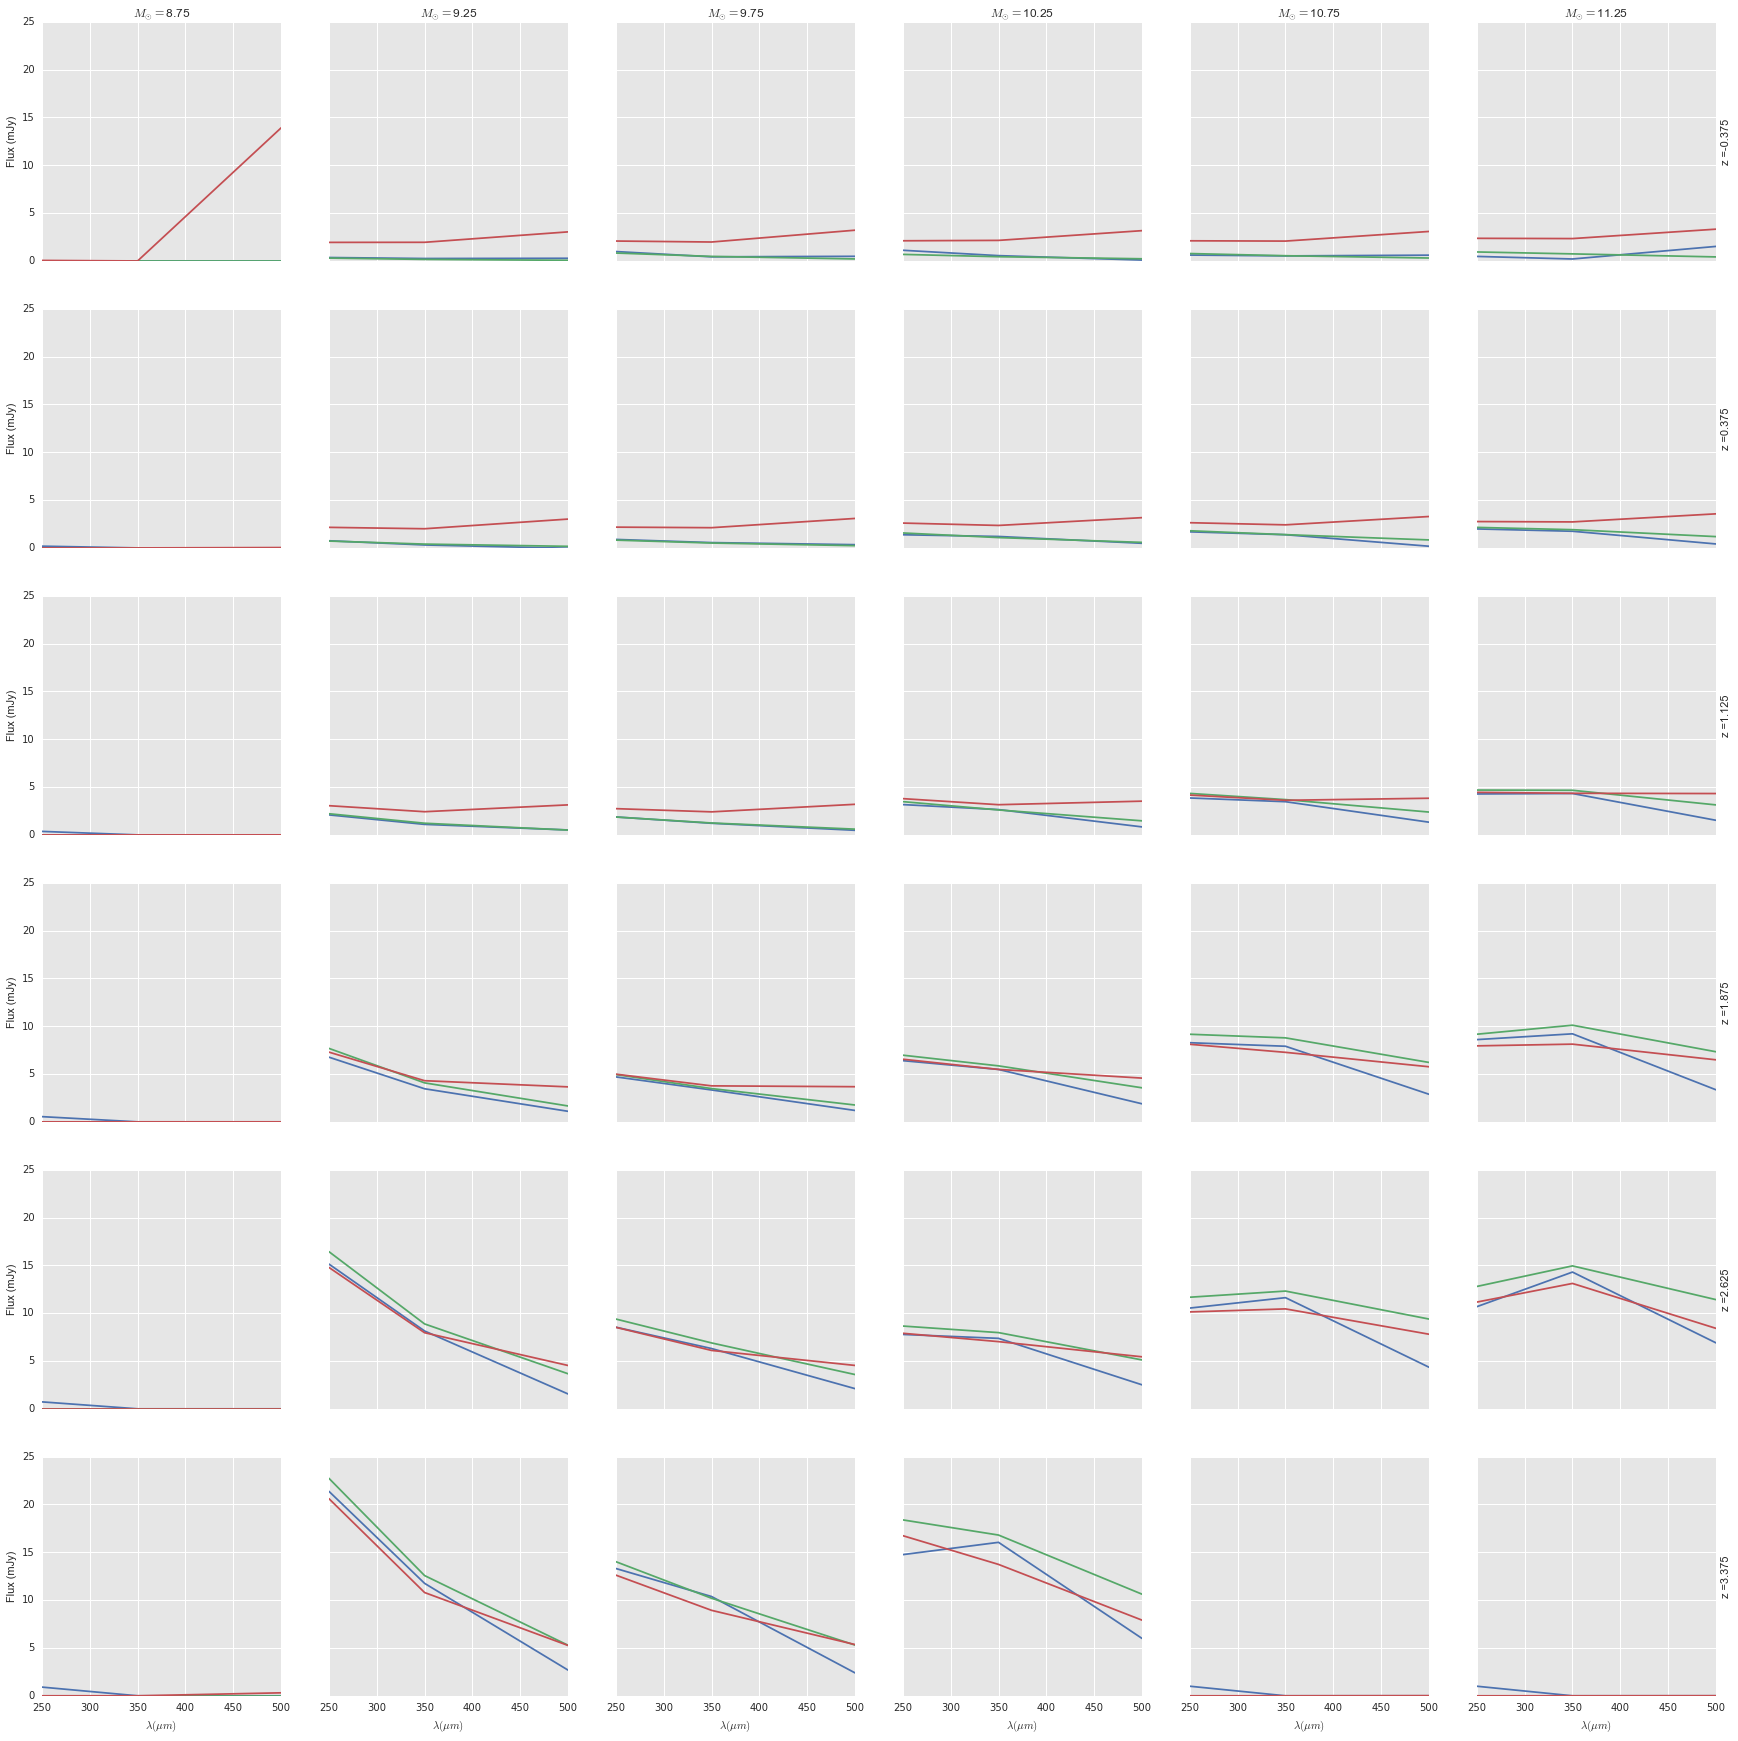

In [70]:
pp = PdfPages('/Users/pdh21/HELP/XID_plus/Paper/Stacking.pdf')

plt.figure(figsize=(30,30))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

f, axarr = plt.subplots(bins_mstar.size+1,bins_red.size+1, sharex='col', sharey='row',figsize=(30,30))
color=['violet','blue','green','yellow','orange','red']
wave=[250,350,500]
ii=1
for i in range(0,bins_mstar.size+1):
    for j in range(0,bins_red.size+1):
        
        axarr[i,j].plot(wave,[S250_Mstar[i,j],S350_Mstar[i,j],S500_Mstar[i,j]])
        axarr[i,j].plot(wave,[S250_Mstar_truth[i,j],S350_Mstar_truth[i,j],S500_Mstar_truth[i,j]])
        axarr[i,j].plot(wave,[np.mean(S250_Mstar_xidplus[i,j,:]),np.mean(S350_Mstar_xidplus[i,j,:]),np.mean(S500_Mstar_xidplus[i,j,:])])
        #axarr[i,j].add_text(350,5,str())
        axarr[j,0].set_ylabel(r'Flux (mJy)')
        axarr[i,j].set_ylim(0,25)


    axarr[0,i].set_title(r'$M_{\odot}=$'+str(np.append(bins_mstar-(bins_mstar[1]-bins_mstar[0])/2.0,bins_mstar[-1]+(bins_mstar[1]-bins_mstar[0])/2.0)[i]))
    axarr[-1,i].set_xlabel(r'$\lambda (\mu m)$')   

for j in range(0,bins_red.size+1):   
    axarr[j,-1].set_ylabel(r'z ='+str(np.append(bins_red-(bins_red[1]-bins_red[0])/2.0,bins_red[-1]+(bins_red[1]-bins_red[0])/2.0)[j]))
    axarr[j,-1].yaxis.set_label_position("right")
pp.savefig(f)
pp.close()

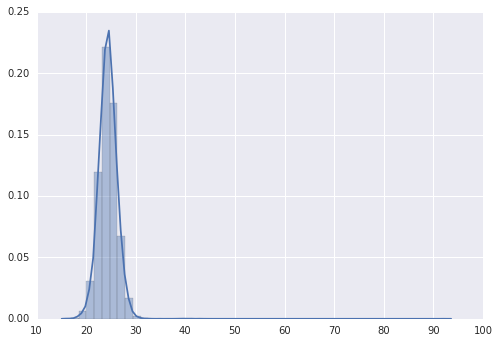

In [116]:
sns.distplot(fcat_sim['APPGSO_TOT_EXT'])

In [151]:
print np.append(bins_red-(bins_red[1]-bins_red[0])/2.0,bins_red[-1]+(bins_red[1]-bins_red[0])/2.0)

[-0.375  0.375  1.125  1.875  2.625  3.375]


In [168]:
#-----------------DESPHOT STUFF----------------------------------
#folder='/research/astro/fir/HELP/DESPHOT/'
folder='/Users/pdh21/HELP/XID_plus_output/plot_test/'
hdulist=fits.open(folder+'cosmos_itermap_lacey_07012015_simulated_observation_w_noise__PSWXID_S100_50mic_test.fits')
fcat=hdulist[1].data
nsources_xid=fcat.shape[0]
print nsources_xid
hdulist.close()

64824


In [172]:
print fcat['INRA']
print fcat_sim['RA'][idx_xidpT]

[ 149.96875     149.9961853   150.92584229 ...,  149.68118286  150.55633545
  150.73605347]
[ 149.96883137  149.99619909  150.92582623 ...,  149.68114305  150.55617263
  150.7361606 ]


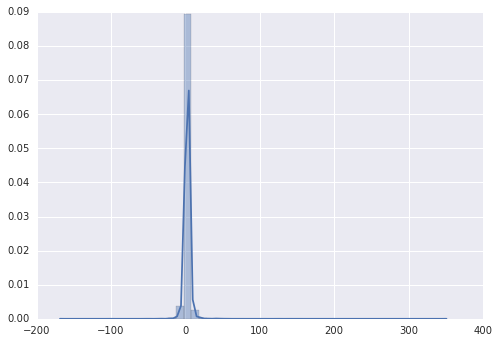

In [177]:
sns.distplot(fcat_sim['S250'][idx_xidpT]-fcat['F250'])

In [192]:
from astropy.coordinates import match_coordinates_sky, SkyCoord
from astropy import units as u
c = SkyCoord(ra=fcat['INRA']*u.degree, dec=fcat['INDEC']*u.degree)  

ind=fcat['F250']==0.0
c = SkyCoord(ra=fcat['INRA'][ind]*u.degree, dec=fcat['INDEC'][ind]*u.degree)  

c1 = SkyCoord(ra=fcat['INRA'][np.invert(ind)]*u.degree, dec=fcat['INDEC'][np.invert(ind)]*u.degree)  

idxc, idxcatalog, d2d, d3d = c.search_around_sky(c1, 3/3600.0*u.deg)

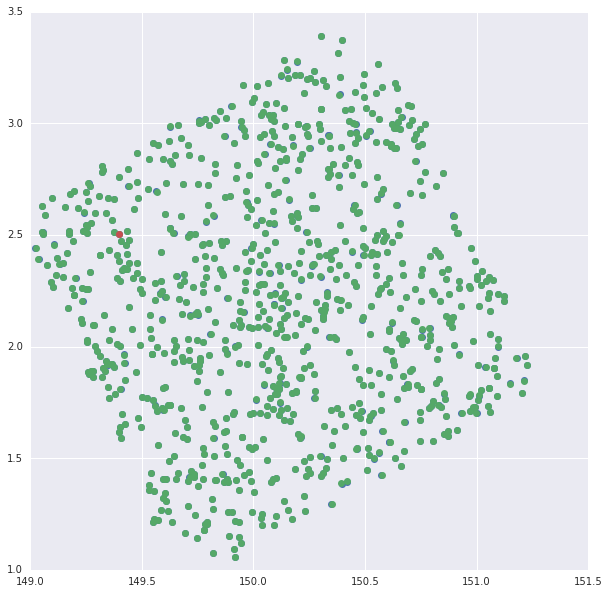

In [246]:
plt.figure(figsize=(10,10))
i=61
plt.plot(fcat['INRA'][np.invert(ind)][idxc],fcat['INDEC'][np.invert(ind)][idxc], 'o')
plt.plot(fcat['INRA'][ind][idxcatalog],fcat['INDEC'][ind][idxcatalog], 'o')
plt.plot(fcat['INRA'][ind][idxcatalog][i],fcat['INDEC'][ind][idxcatalog][i], 'o')

In [238]:
for i in range(0,idxcatalog.size):
    print fcat['F250'][ind][idxcatalog][i],fcat_sim['S250'][idx_xidp][ind][idxcatalog][i],fcat['F250'][np.invert(ind)][idxc][i],fcat_sim['S250'][idx_xidp][np.invert(ind)][idxc][i],i,d2d[i]

0.0 5.06749 9.08637 6.55545 0 0d00m01.9763s
0.0 3.29107 0.436831 0.504685 1 0d00m02.8348s
0.0 1.74941 10.8718 24.4044 2 0d00m01.7737s
0.0 2.38321 2.35933 2.59879 3 0d00m02.5174s
0.0 0.433671 8.28184 1.66551 4 0d00m00.4063s
0.0 4.9114 3.7197 4.09964 5 0d00m01.6514s
0.0 11.5703 14.0469 5.69614 6 0d00m00.2321s
0.0 12.3922 13.1496 2.25523 7 0d00m01.6194s
0.0 0.348009 4.43773 1.63702 8 0d00m01.7958s
0.0 0.684523 11.5076 18.7684 9 0d00m02.0876s
0.0 4.42946 1.33376 0.021137 10 0d00m02.3978s
0.0 2.3975 18.0406 22.236 11 0d00m02.7067s
0.0 0.83961 12.2578 8.73446 12 0d00m02.774s
0.0 11.2323 10.4057 0.143806 13 0d00m01.4207s
0.0 4.23661 1.39621 0.600531 14 0d00m01.4177s
0.0 1.22011 1.53685 1.86133 15 0d00m02.4914s
0.0 1.22437 0.259242 6.08292 16 0d00m02.3762s
0.0 4.38375 0.92401 0.345118 17 0d00m01.87s
0.0 0.10011 23.9257 25.3431 18 0d00m00.0054s
0.0 1.57841 3.02775 2.29788 19 0d00m00.3908s
0.0 20.5631 24.8763 8.02014 20 0d00m02.2894s
0.0 18.7315 12.3116 0.659448 21 0d00m01.7017s
0.0 1.24274 7.90

In [244]:
i=61
from xidplus import moc_routines
Tile=moc_routines.get_HEALPix_pixels(10,fcat['INRA'][ind][idxcatalog][i],fcat_sim['DEC'][idx_xidp][ind][idxcatalog][i])
print fcat['INRA'][ind][idxcatalog][i],fcat_sim['DEC'][idx_xidp][ind][idxcatalog][i]

149.398 2.50651382362


In [245]:
folder='/Users/pdh21/HELP/XID_plus/scripts/test_run/'
infile=folder+'Master_prior.pkl'
with open(infile, "rb") as f:
    obj = pickle.load(f)
tiles=obj['tiles']
order=obj['order']
print order
np.where(tiles==Tile)

10


(array([748]),)

In [243]:
print Tile

[6975355]
